In [60]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [103]:
df=pd.read_csv("amazon.csv")

In [104]:
l=[]
l.append('S_no.')
i=1
for x in list(df.columns[1:]):
  l.append(df.columns[i])
  i+=1


In [106]:
l
df.columns=l

In [107]:
df

,S_no.,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0


In [65]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [66]:
example=df['reviewText'][120]
example

"I expanded my Samsung Tab 10.1 tablet from 1GB to 32GB works fast and don't see any lags. I can now store more than ten movies on my tab and play right of the flash disc with no problems.Very happy with this card."

In [67]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [68]:
df['overall'][76]

5

In [69]:
df=df[df['reviewText'].notna()]

In [70]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [71]:
a=np.zeros((3,5))
sum=np.zeros((3,))
for j in df['S_no.'][:721]:
  if (len(nltk.word_tokenize(df['reviewText'][j])))>350:
    d=polarity_scores_roberta(' '.join(nltk.word_tokenize(df['reviewText'][j])[:350]))
  else:
    d=polarity_scores_roberta(df['reviewText'][j])
  negative=d['roberta_neg']
  neutral=d['roberta_neu']
  positive=d['roberta_pos']
  rating=df['overall'][j]
  if(negative>neutral and negative> positive):
    sentiment='Negative'
    x=0
    sum[0]+=1
  elif(neutral>negative and neutral> positive):
    sentiment='Neutral'
    x=1
    sum[1]+=1
  elif(positive>negative and positive> neutral):
    sentiment='Positive'
    x=2
    sum[2]+=1
  y=rating-1
  a[x][y]+=1
  print("ID "+str(j)+",Rating "+str(rating)+","+"Sentiment "+sentiment)
for i in range(3):
  for j in range(5):
    a[i][j]=a[i][j]/sum[i]*100

ID 0,Rating 4,Sentiment Neutral
ID 1,Rating 5,Sentiment Positive
ID 2,Rating 4,Sentiment Neutral
ID 3,Rating 5,Sentiment Positive
ID 4,Rating 5,Sentiment Positive
ID 5,Rating 5,Sentiment Positive
ID 6,Rating 5,Sentiment Negative
ID 7,Rating 5,Sentiment Positive
ID 8,Rating 5,Sentiment Positive
ID 9,Rating 5,Sentiment Positive
ID 10,Rating 5,Sentiment Positive
ID 11,Rating 3,Sentiment Neutral
ID 12,Rating 5,Sentiment Positive
ID 13,Rating 5,Sentiment Positive
ID 14,Rating 5,Sentiment Neutral
ID 15,Rating 5,Sentiment Positive
ID 16,Rating 5,Sentiment Positive
ID 17,Rating 5,Sentiment Positive
ID 18,Rating 5,Sentiment Positive
ID 19,Rating 5,Sentiment Neutral
ID 20,Rating 5,Sentiment Positive
ID 21,Rating 5,Sentiment Positive
ID 22,Rating 5,Sentiment Positive
ID 23,Rating 5,Sentiment Positive
ID 24,Rating 5,Sentiment Positive
ID 25,Rating 5,Sentiment Positive
ID 26,Rating 5,Sentiment Positive
ID 27,Rating 5,Sentiment Positive
ID 28,Rating 5,Sentiment Positive
ID 29,Rating 5,Sentiment Neut

In [72]:
categories=[]
values=[]
for i in range(3):
  for j in range(5):
    if(i==0):
      categories.append("(Neg,"+str(j+1)+")")
    elif(i==1):
      categories.append("(Neu,"+str(j+1)+")")
    else:
      categories.append("(Pos,"+str(j+1)+")")
    values.append(a[i][j])

In [73]:
df[df['S_no.']==722]

,S_no.,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
722,722,Brett in Denver,4,The description on the Amazon page calls this ...,27-03-2013,621,2,0,2,2,1.0,0.34238


In [74]:
categories

['(Neg,1)',
 '(Neg,2)',
 '(Neg,3)',
 '(Neg,4)',
 '(Neg,5)',
 '(Neu,1)',
 '(Neu,2)',
 '(Neu,3)',
 '(Neu,4)',
 '(Neu,5)',
 '(Pos,1)',
 '(Pos,2)',
 '(Pos,3)',
 '(Pos,4)',
 '(Pos,5)']

In [75]:
sum

array([ 59.,  58., 604.])

In [76]:
a

array([[44.06779661, 18.6440678 , 11.86440678, 10.16949153, 15.25423729],
       [ 5.17241379,  5.17241379, 10.34482759, 17.24137931, 62.06896552],
       [ 1.1589404 ,  0.16556291,  1.32450331,  9.27152318, 88.0794702 ]])

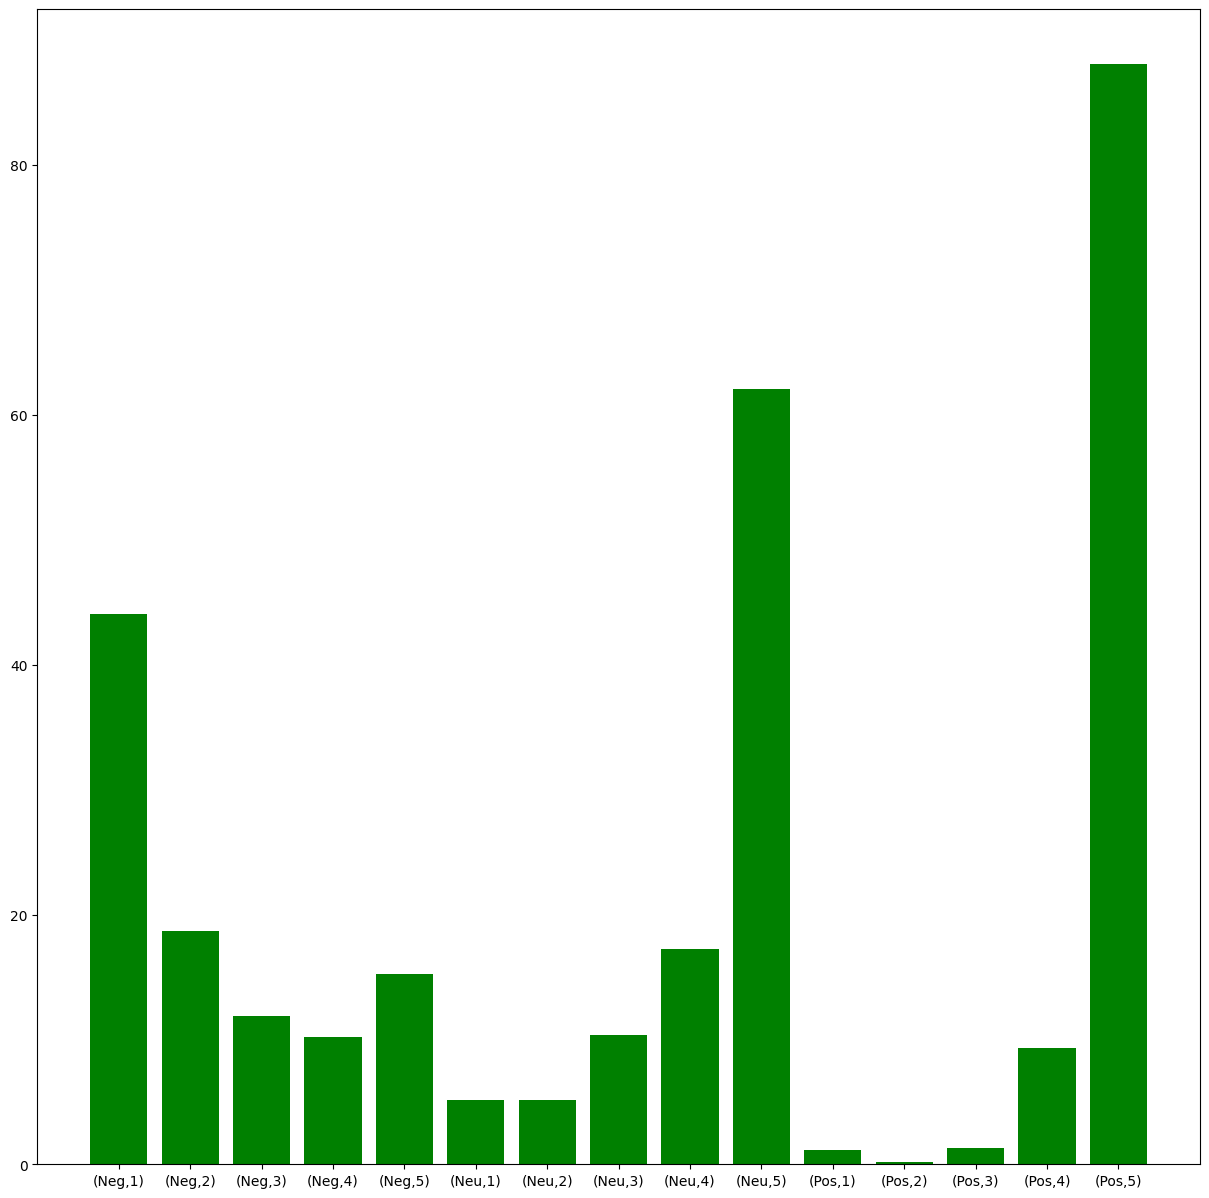

In [77]:
plt.figure(figsize=(15, 15))
# Create a bar plot
plt.bar(categories, values, color='green')

plt.show()

In [78]:
accuracy= (a[0][0]+a[0][1]+a[1][2]+a[1][3]+a[1][4]+a[2][2]+a[2][3]+a[2][4])/(a.sum())*100

In [79]:
print("Accuracy: "+str(accuracy)+"%")

Accuracy: 83.68084450310482%


In [80]:
print("Confusion Matrix:\n", a)

Confusion Matrix:
 [[44.06779661 18.6440678  11.86440678 10.16949153 15.25423729]
 [ 5.17241379  5.17241379 10.34482759 17.24137931 62.06896552]
 [ 1.1589404   0.16556291  1.32450331  9.27152318 88.0794702 ]]


In [81]:
!pip install sentencepiece

In [82]:
from transformers import XLNetTokenizer, TFXLNetForSequenceClassification
import tensorflow as tf
import numpy as np

# Load pretrained XLNet model and tokenizer
model_name = "xlnet-base-cased"
model = TFXLNetForSequenceClassification.from_pretrained(model_name)
tokenizer = XLNetTokenizer.from_pretrained(model_name)




/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetForSequenceClassification: ['lm_loss']
- This IS expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertF

In [83]:
def XL(statement):

  # Tokenize the statement
  tokenized_statement = tokenizer(statement, return_tensors="tf", padding=True, truncation=True)

  # Convert BatchEncoding to a dictionary of NumPy arrays
  tokenized_statement_dict = {key: np.array(value) for key, value in tokenized_statement.items()}

  # Make prediction
  logits = model.predict(tokenized_statement_dict)[0]
  predicted_class = tf.argmax(logits, axis=1).numpy()[0]

  #   Print the predicted sentiment
  sentiment = "positive" if predicted_class == 1 else "negative"
  return sentiment

In [84]:
a=np.zeros((2,5))
sum=np.zeros((2,))
for j in df['S_no.'][:100]:
  sentiment=XL(df['reviewText'][j])
  rating=df['overall'][j]
  if(sentiment=='positive'):
    x=1
    sum[1]+=1
  else:
    x=0
    sum[0]+=1
  y=rating-1
  a[x][y]+=1
  print("ID "+str(j)+",Rating "+str(rating)+","+"Sentiment "+sentiment)
for i in range(2):
  for j in range(5):
    a[i][j]=a[i][j]/sum[i]*100

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


1/1 [==============================] - 4s 4s/step
ID 0,Rating 4,Sentiment positive
1/1 [==============================] - 5s 5s/step
ID 1,Rating 5,Sentiment negative
1/1 [==============================] - 1s 773ms/step
ID 2,Rating 4,Sentiment positive
1/1 [==============================] - 1s 1s/step
ID 3,Rating 5,Sentiment positive
1/1 [==============================] - 1s 973ms/step
ID 4,Rating 5,Sentiment positive
1/1 [==============================] - 1s 953ms/step
ID 5,Rating 5,Sentiment positive
1/1 [==============================] - 1s 772ms/step
ID 6,Rating 5,Sentiment positive
1/1 [==============================] - 1s 741ms/step
ID 7,Rating 5,Sentiment positive
1/1 [==============================] - 0s 393ms/step
ID 8,Rating 5,Sentiment positive
1/1 [==============================] - 0s 325ms/step
ID 9,Rating 5,Sentiment positive
1/1 [==============================] - 1s 767ms/step
ID 10,Rating 5,Sentiment positive
1/1 [==============================] - 1s 631ms/step
ID 11,Rat

In [85]:
categories=[]
values=[]
for i in range(2):
  for j in range(5):
    if(i==0):
      categories.append("(Neg,"+str(j+1)+")")
    else:
      categories.append("(Pos,"+str(j+1)+")")
    values.append(a[i][j])

In [86]:
values

[0.0,
 6.666666666666667,
 0.0,
 0.0,
 93.33333333333333,
 3.5294117647058822,
 0.0,
 2.3529411764705883,
 10.588235294117647,
 83.52941176470588]

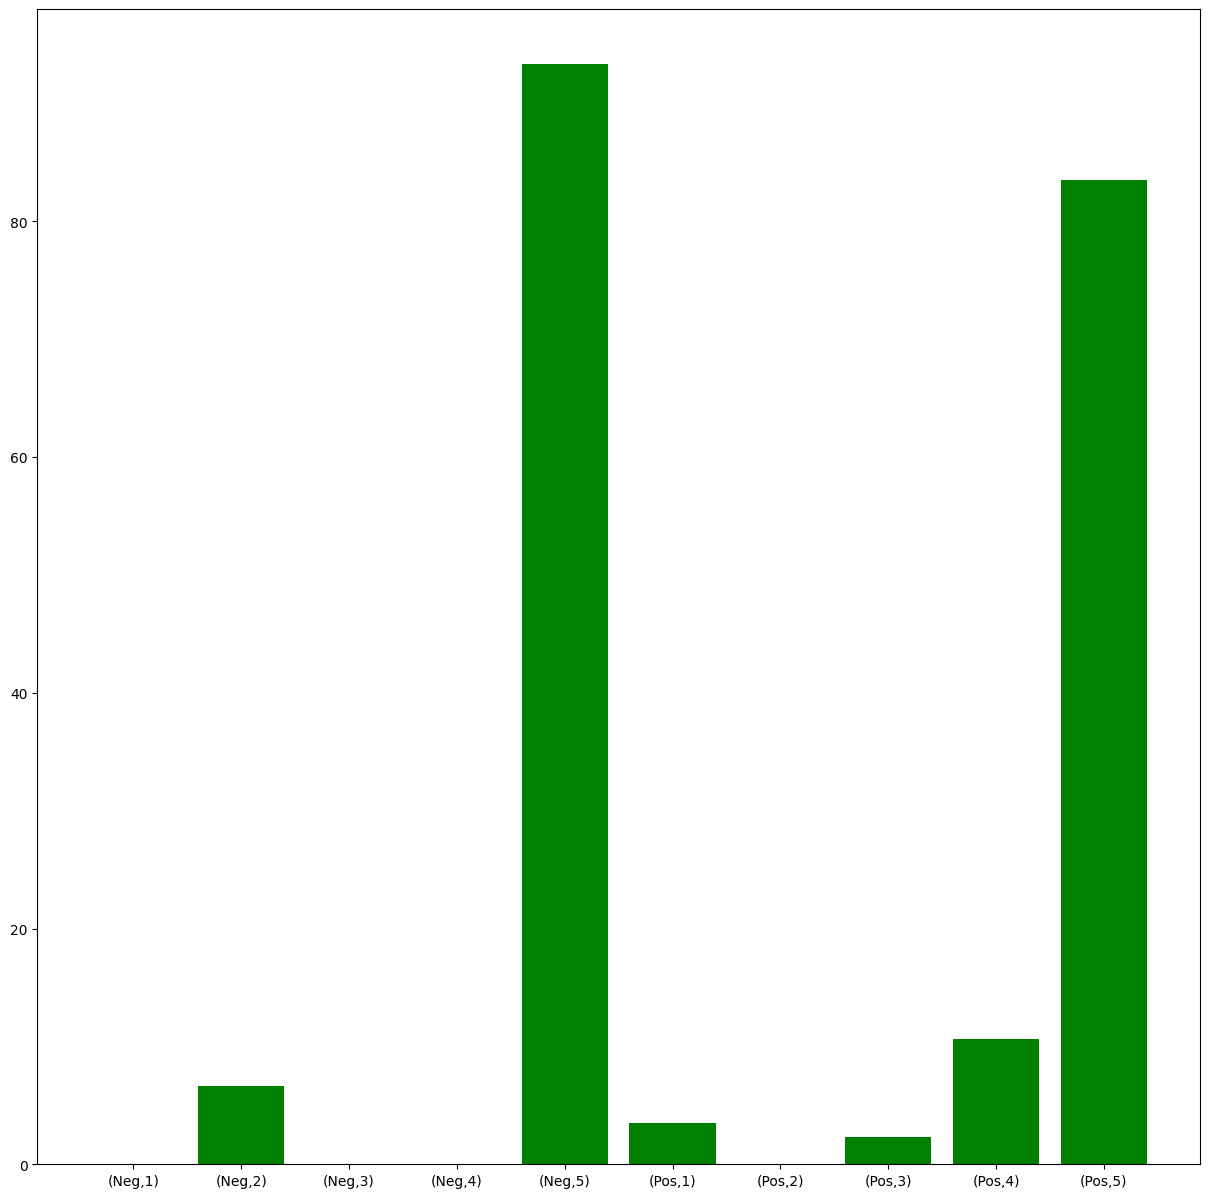

In [87]:
plt.figure(figsize=(15, 15))
# Create a bar plot
plt.bar(categories, values, color='green')

plt.show()

In [88]:
accuracy= (a[0][0]+a[0][1]+a[1][2]+a[1][3]+a[1][4])/(a.sum())*100

In [89]:
print("Accuracy: "+str(accuracy)+"%")

Accuracy: 51.5686274509804%


In [90]:
print("Confusion Matrix:\n",a)

Confusion MAtrix:
 [[ 0.          6.66666667  0.          0.         93.33333333]
 [ 3.52941176  0.          2.35294118 10.58823529 83.52941176]]


In [91]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load pretrained BERT model and tokenizer for sentiment analysis
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)



In [92]:
def BERT(statement):

  # Example statement

  # Tokenize the statement
  tokenized_statement = tokenizer(statement, return_tensors="pt", padding=True, truncation=True)

  # Make prediction
  with torch.no_grad():
    logits = model(**tokenized_statement).logits

  # Convert logits to probabilities
  probabilities = torch.nn.functional.softmax(logits, dim=1)

  # Get the predicted sentiment class (0 to 4, corresponding to very negative to very positive)
  predicted_class = torch.argmax(probabilities, dim=1).item()

  # Print the predicted sentiment
  sentiment_mapping = {0: 'very negative', 1: 'negative', 2: 'neutral', 3: 'positive', 4: 'very positive'}
  predicted_sentiment = sentiment_mapping[predicted_class]
  return predicted_class

In [93]:
correct=0
c=0
df_list = []
for j in df['S_no.'][:100]:
  rating=BERT(df['reviewText'][j])
  rating_hat=df['overall'][j]
  if abs(rating_hat-rating)<=1:
    correct+=1
  c+=1
  print([rating,rating_hat,abs(rating_hat-rating)])
  df_list.append([rating,rating_hat,abs(rating_hat-rating)])

[3, 4, 1]
[4, 5, 1]
[2, 4, 2]
[0, 5, 5]
[4, 5, 1]
[2, 5, 3]
[4, 5, 1]
[4, 5, 1]
[4, 5, 1]
[3, 5, 2]
[4, 5, 1]
[2, 3, 1]
[0, 5, 5]
[4, 5, 1]
[3, 5, 2]
[4, 5, 1]
[4, 5, 1]
[4, 5, 1]
[4, 5, 1]
[3, 5, 2]
[4, 5, 1]
[3, 5, 2]
[4, 5, 1]
[2, 5, 3]
[3, 5, 2]
[4, 5, 1]
[2, 5, 3]
[4, 5, 1]
[4, 5, 1]
[3, 5, 2]
[4, 5, 1]
[4, 5, 1]
[0, 1, 1]
[4, 4, 0]
[4, 5, 1]
[1, 5, 4]
[4, 5, 1]
[4, 5, 1]
[0, 1, 1]
[0, 5, 5]
[4, 5, 1]
[4, 5, 1]
[4, 5, 1]
[0, 1, 1]
[3, 4, 1]
[3, 5, 2]
[3, 5, 2]
[3, 5, 2]
[3, 5, 2]
[1, 2, 1]
[0, 5, 5]
[4, 5, 1]
[4, 5, 1]
[2, 4, 2]
[3, 5, 2]
[4, 5, 1]
[3, 4, 1]
[4, 5, 1]
[4, 5, 1]
[4, 5, 1]
[4, 5, 1]
[4, 5, 1]
[4, 5, 1]
[4, 5, 1]
[0, 3, 3]
[4, 5, 1]
[4, 5, 1]
[4, 5, 1]
[4, 5, 1]
[4, 5, 1]
[4, 5, 1]
[3, 5, 2]
[3, 5, 2]
[4, 5, 1]
[4, 5, 1]
[3, 5, 2]
[0, 5, 5]
[4, 5, 1]
[4, 5, 1]
[3, 5, 2]
[4, 5, 1]
[4, 5, 1]
[3, 5, 2]
[3, 5, 2]
[4, 5, 1]
[4, 5, 1]
[4, 5, 1]
[4, 5, 1]
[4, 5, 1]
[2, 4, 2]
[4, 5, 1]
[3, 4, 1]
[4, 5, 1]
[4, 5, 1]
[4, 5, 1]
[2, 5, 3]
[4, 4, 0]
[4, 5, 1]
[2, 5, 3]
[4, 5, 1]


In [94]:
Accuracy=(correct/c)*100

In [95]:
print("Accuracy: "+str(Accuracy)+"%")

Accuracy: 68.0%


In [100]:
df_ = pd.DataFrame(df_list,columns=["category_encoded","predicted_sentiment","diff"])

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_true = df_['category_encoded']
y_pred = df_['predicted_sentiment']

# Calculate and print the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Calculate and print other metrics
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report which includes precision, recall, and F1 score
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[ 3 25]
 [ 1 71]]
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.11      0.19        28
           1       0.74      0.99      0.85        72

    accuracy                           0.74       100
   macro avg       0.74      0.55      0.52       100
weighted avg       0.74      0.74      0.66       100



In [97]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch

# Load pretrained DistilBERT model and tokenizer for sentiment analysis
model_name = "assemblyai/distilbert-base-uncased-sst2"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name)


In [98]:
def distilBERT(statement):
  tokenized_statement = tokenizer(statement, return_tensors="pt", padding=True, truncation=True)

  # Make prediction
  with torch.no_grad():
    logits = model(**tokenized_statement).logits

  # Convert logits to probabilities
  probabilities = torch.nn.functional.softmax(logits, dim=1)

  # Get the predicted sentiment class (0 for negative, 1 for positive)
  predicted_class = torch.argmax(probabilities, dim=1).item()

  # Print the predicted sentiment
  sentiment_mapping = {0: 'negative', 1: 'positive'}
  predicted_sentiment = sentiment_mapping[predicted_class]

  return predicted_class

In [108]:
correct=0
c=0
df_list = []
for j in df['S_no.'][:100]:
  rating=distilBERT(df['reviewText'][j])
  if (df['overall'][j]>2):
    rating_hat=1
  else:
    rating_hat=0
  if rating_hat==rating:
    correct+=1
  c+=1
  print([rating,rating_hat,abs(rating_hat-rating)])
  df_list.append([rating,rating_hat,abs(rating_hat-rating)])

[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[0, 1, 1]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[0, 0, 0]
[1, 1, 0]
[0, 1, 1]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 0, 1]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[0, 0, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[0, 0, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]


In [109]:
Accuracy=(correct/c)*100

In [110]:
print("Accuracy: "+str(Accuracy)+"%")

Accuracy: 73.0%


In [111]:
df_ = pd.DataFrame(df_list,columns=["category_encoded","predicted_sentiment","diff"])

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_true = df_['category_encoded']
y_pred = df_['predicted_sentiment']

# Calculate and print the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Calculate and print other metrics
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report which includes precision, recall, and F1 score
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[ 3 26]
 [ 1 70]]
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.10      0.18        29
           1       0.73      0.99      0.84        71

    accuracy                           0.73       100
   macro avg       0.74      0.54      0.51       100
weighted avg       0.74      0.73      0.65       100



In [112]:
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification
import torch

# Load pretrained GPT-2 model and tokenizer for sentiment analysis
model_name = "michelecafagna26/gpt2-medium-finetuned-sst2-sentiment"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2ForSequenceClassification.from_pretrained(model_name)



In [113]:
def GPT2(statement):
  tokenized_statement = tokenizer(statement, return_tensors="pt", padding=True, truncation=True)

# Make prediction
  with torch.no_grad():
    logits = model(**tokenized_statement).logits

# Convert logits to probabilities
  probabilities = torch.nn.functional.softmax(logits, dim=1)

# Get the predicted sentiment class (0 for negative, 1 for positive)
  predicted_class = torch.argmax(probabilities, dim=1).item()

# Print the predicted sentiment
  sentiment_mapping = {0: 'negative', 1: 'positive'}
  predicted_sentiment = sentiment_mapping[predicted_class]

  return predicted_class


In [114]:
correct=0
c=0
df_list = []
for j in df['S_no.'][:100]:
  rating=GPT2(df['reviewText'][j])
  if (df['overall'][j]>2):
    rating_hat=1
  else:
    rating_hat=0
  if rating_hat==rating:
    correct+=1
  c+=1
  print([rating,rating_hat,abs(rating_hat-rating)])
  df_list.append([rating,rating_hat,abs(rating_hat-rating)])

[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[0, 0, 0]
[1, 1, 0]
[0, 1, 1]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 0, 1]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[0, 0, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[0, 0, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[0, 1, 1]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[0, 1, 1]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]
[1, 1, 0]


In [115]:
Accuracy=(correct/c)*100

In [117]:
print("Accuracy: "+str(Accuracy)+"%")

Accuracy: 74.0%


In [116]:
df_ = pd.DataFrame(df_list,columns=["category_encoded","predicted_sentiment","diff"])

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_true = df_['category_encoded']
y_pred = df_['predicted_sentiment']

# Calculate and print the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Calculate and print other metrics
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report which includes precision, recall, and F1 score
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[ 3 25]
 [ 1 71]]
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.11      0.19        28
           1       0.74      0.99      0.85        72

    accuracy                           0.74       100
   macro avg       0.74      0.55      0.52       100
weighted avg       0.74      0.74      0.66       100



# Accuracies of various models:

*   RoBERTa -- **83.68%**
*   XLnet -- **52.52%**
*   BERT -- **68.00%**
*   DistilBERT -- **73.00%**
*   GPT2 -- **74.00%**

